# Food Insecurity Across U.S. Counties
**Authors:** Nabaa Al Hashimi
**Live site:** https://nabaahashimi.github.io/food_insecurity_project/

# Project description
**Description:** My project investigates the factors driving food insecurity across U.S. counties. I aim to examine how socioeconomic indicators (income, poverty, unemployment, education), geographic context (urban vs. rural), and environmental stressors (climate and drought) explain variation in food insecurity rates.

I will combine data from the USDA Food Environment Atlas, Feeding America’s Map the Meal Gap, the U.S. Census Bureau’s American Community Survey, and NOAA climate records. After cleaning and merging these datasets, I will conduct exploratory data analysis to visualize patterns. Then I hope to conduct a model for predictive analysis and clear visulaizations to communicate results.

# Project Plan
**Plan:**
1. Collaboration: N/A individual project because I am a graduate student
2. Data sources:
* USDA Food Access Research Atlas: This dataset maps food deserts and measures food access at the census tract level using income, vehicle access, and distance to grocery stores. (Link: https://catalog.data.gov/dataset/food-access-research-atlas)
**Possible questions to answer with this data:**
1. How does vehicle ownership affect grocery store access in rural vs. urban tracts?
2. Are low-income tracts in certain regions (e.g., the South vs. Midwest) more likely to be classified as food deserts?
3. What proportion of food desert tracts also experience high poverty or unemployment rates?

* NOAA Climate Data – Climate at a Glance / NCEI: This data provides climate and drought indicators by county which is important for analyzing whether environmental stress that correlates with food insecurity. (Link: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/time-series)
**Possible questions to answer with this data:**
1. Does prolonged drought (e.g., high Palmer Drought Severity Index) correlate with higher county food insecurity rates?
2. Are counties with greater temperature variability more prone to persistent food deserts?
3. How do changes in precipitation trends affect agricultural productivity and local food access?

* USDA Food Environment Atlas: This dataset combines health, economic, and food environment indicators at the county level. (link: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads)
**Possible questions to answer with this data:**
1. Which socioeconomic variables (e.g., poverty, unemployment, SNAP participation) are the strongest predictors of county food insecurity?
2. Do counties with higher rates of SNAP participation or school lunch program coverage show lower food insecurity?
3. How do health outcomes (e.g., obesity or diabetes prevalence) align with food access levels?

* USDA NASS Quick Stats Database: Gives county-level agricultural production and land use data that will be useful to assess whether agricultural dependence affects food insecurity. (link: https://www.nass.usda.gov/Quick_Stats/CDQT/chapter/1/table/1/)
**Possible questions to answer with this data:**
1. Do agricultural counties (high crop or livestock production) experience lower local food insecurity, or does production not translate into access?
2. How has agricultural diversification (variety of crops) affected food availability or resilience during drought years?
3. Are counties with more small farms less likely to be food deserts compared to those dominated by large-scale operations?



In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Nabaa - Milestone 1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Nabaa - Milestone 1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 386174 bytes to /content/drive/MyDrive/Colab Notebooks/Nabaa - Milestone 1.html


In [31]:
#clone github repository and add notebook
!git clone https://github.com/nabaahashimi/food_insecurity_project.git
%cd food-insecurity-project
!git add .
!git commit -m "Add Milestone 1 notebook"
!git push

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cloning into 'food_insecurity_project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (2/2), done.
Receiving objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
[Errno 2] No such file or directory: 'food-insecurity-project'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


# USDA Food Access Research Atlas (for ETL and EDA)
* Dataset name: USDA Food Access Research Atlas
* Source: https://catalog.data.gov/dataset/food-access-research-atlas
* Collected by: U.S. Department of Agriculture, Economic Research Service (ERS)
* Description of dataset: This dataset provides census-tract–level information on food access indicators across the U.S. It identifies “food deserts” based on distance to grocery stores, income levels, and vehicle availability. Each row corresponds to a census tract with socioeconomic and geographic indicators.
* How it can be used: It helps investigate questions like “How does vehicle ownership or income affect access to grocery stores in rural vs. urban areas?” or “Which regions experience the highest concentration of food deserts?”
* ETL methods:
1. Extraction: The dataset was obtained directly from the USDA Food Access Research Atlas as a publicly available CSV file. It was downloaded and loaded into the notebook using pandas.read_csv().
2. Transformation: Unnecessary columns were filtered out for clarity, variable names were simplified for readability, data types (dtypes) were explicitly converted to numeric values to ensure accurate computations, missing values (NaN) were handled using fillna(0), derived columns such as low_income_rate (ratio of low-income population to total population) were computed to support analysis, data were validated for consistency and tidied so each row represents one census tract with clearly labeled variables.
3. Load: The clean dataset was stored in a pandas DataFrame (df), ready for exploratory analysis and modeling.
* EDA methods:
1. Summary Statistics: Used df.describe() to view mean, median, and distribution of major variables (low_income_pop, no_vehicle_households, etc.) to understand central tendencies and variation.
2. Correlations: Computed correlation coefficients between income, vehicle access, and food access variables to examine structural linkages.
3. Grouping and Comparison: Used groupby() to compare food access across urban vs. rural tracts and across states to reveal geographic disparities.
4. Visualization: Created visual summaries like Histogram of the population with low food access (sns.histplot()) and Scatter plot of income vs. vehicle access to visualize correlations.
5. Interpretation:Each visualization and summary was paired with a short interpretation explaining how it relates to the main research question — understanding the socioeconomic and geographic drivers of food access inequality.

In [4]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Food Access Research Atlas.csv")

# Display basic info
df.info()

# Peek at first few rows
df.head()

Saving Food Access Research Atlas.csv to Food Access Research Atlas.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [17]:
# Rename columns for easier access (using the actual names from your dataset)
df.rename(columns={
    'OHU2010': 'occupied_housing_units_2010',
    'LALOWI1_10': 'low_access_1mile_urban_10mile_rural' ,
    'LAPOP1_10': 'low_access_population_1mi_urban_10mi_rural',
    'LILATracts_1And10': 'low_income_low_access_tracts_1mi_urban_10mi_rural',
    'LILATracts_Vehicle': 'low_income_low_vehicle_access_tracts',
    'TractSNAP': 'snap_households',
    'HUNVFlag': 'no_vehicle_flag'
}, inplace=True)

# Set correct data types
numeric_cols = ['low_income_pop', 'no_vehicle_households', 'low_access_1mile_urban_10mile_rural']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values
df[numeric_cols] = df[numeric_cols].fillna(0)

df.head()

,CensusTract,State,County,Urban,Pop2010,occupied_housing_units_2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,low_income_low_access_tracts_1mi_urban_10mi_rural,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,no_vehicle_households,snap_households
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [18]:
# Summary statistics
df[numeric_cols].describe()

,low_income_pop,no_vehicle_households,low_access_1mile_urban_10mile_rural
count,72531.000000,72531.000000,72531.000000
mean,1384.977968,143.701810,259.668735
std,983.735997,232.734898,501.362281
min,0.000000,0.000000,0.000000
25%,680.000000,36.000000,0.000000
50%,1164.000000,82.000000,13.000000
75%,1846.000000,168.000000,310.000000
max,12562.000000,6059.000000,9402.000000


In [22]:
df['low_income_rate'] = df['low_income_pop'] / df['Pop2010'] * 100
print("Average low-income rate across tracts: ", df['low_income_rate'].mean().round(2), "%")

Average low-income rate across tracts:  33.61 %


In [23]:
corr = df['low_income_pop'].corr(df['no_vehicle_households'])
print("Correlation between low income and no vehicle access:", round(corr, 2))

Correlation between low income and no vehicle access: 0.31


In [25]:
df.groupby('Urban').agg({
    'low_income_pop': 'mean',
    'no_vehicle_households': 'mean',
    'low_access_1mile_urban_10mile_rural': 'mean'
})

,low_income_pop,no_vehicle_households,low_access_1mile_urban_10mile_rural
Urban,,,
0,1274.080521,69.433994,109.029662
1,1419.878029,167.074317,307.075713


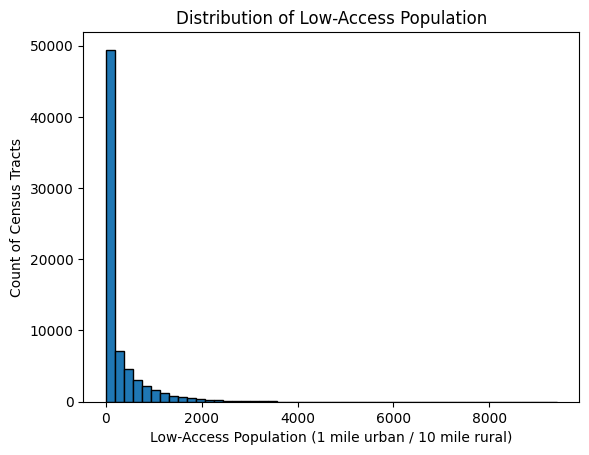

In [28]:
df['low_access_1mile_urban_10mile_rural'].plot.hist(bins=50, edgecolor='black')
plt.title('Distribution of Low-Access Population')
plt.xlabel('Low-Access Population (1 mile urban / 10 mile rural)')
plt.ylabel('Count of Census Tracts')
plt.show()

# Discussion of EDA results and next steps
The histogram shows a highly right-skewed distribution of the low-access population across U.S. census tracts. Most tracts have relatively small populations experiencing limited food access (within 1 mile urban or 10 miles rural), while a small number of tracts have disproportionately high counts. This suggests that food inaccessibility is concentrated in specific regions rather than widespread evenly across all areas.

The tall spike near zero indicates that the majority of census tracts have fewer than a few hundred residents facing limited access to grocery stores. In contrast, the long tail extending to the right highlights a subset of rural tracts where thousands of people live far from food sources, reflecting spatial isolation and infrastructure gaps.

Overall, this pattern reveals uneven food access, where most communities are relatively well served but a minority face severe limitations. These high-value outliers are critical for targeted policy interventions, as they represent regions where geographic and socioeconomic disadvantages intersect to create heightened food insecurity.